# Onderzoeken van alarmen uit database

in alarmlijstProper zitten de data als volgt:
* MessageDefinitionUID, (iets database gerelateerd)
* Tijdstip van optreden,
* ON/OFF (respectievelijk 1/2)
* AlarmText (tekst die operator te zien krijg in wincc)
* AlarmComponentId (vermoedelijk id van component waarop alarm optreed, alhoewel)

In [1]:
import csv
from bs4 import BeautifulSoup
import time
from pprint import pprint
from matplotlib import pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline


with open("original_input/alarmlijstProper.csv") as f:
    alarms = list(csv.reader(f, delimiter=",", quotechar='"'))
with open("original_input/alarmTags.xml") as f:
    soup = BeautifulSoup(f,"lxml")
    ids =  [x.string for x in soup.find_all("id")]
    print(len(ids))

short_ids = list(set([x.split("-")[0] for x in ids]))

for i in range(len(alarms)):
    alarms[i][-2] = alarms[i][-2].replace("-","_")
sorted(short_ids)[:10]

845


['CF_HMI_ST623_003_PLC07',
 'CF_HMI_ST623_PLC07',
 'CF_HMI_ST625A_PLC07',
 'FCV_250_04_041',
 'FCV_250_05_041',
 'FCV_L116_002',
 'FCV_L117_002',
 'FCV_L118_002',
 'FCV_L119_002',
 'FQT_L116_001_AL_INIT']

In [3]:
alarms[:10]

[['FE5C0A5B-E6C5-4E0E-9DF4-9F692055449B',
  '2015-12-12 23:00:06.0850000',
  '2',
  'FT_21249_TOT : TOTALIZER MEETSTRAAT PETROFINA COMMENTAAR AAN',
  'FT_21249_TOT'],
 ['FE5C0A5B-E6C5-4E0E-9DF4-9F692055449B',
  '2015-12-12 23:00:17.0640000',
  '1',
  'FT_21249_TOT : TOTALIZER MEETSTRAAT PETROFINA COMMENTAAR AAN',
  'FT_21249_TOT'],
 ['FE5C0A5B-E6C5-4E0E-9DF4-9F692055449B',
  '2015-12-12 23:00:27.9850000',
  '2',
  'FT_21249_TOT : TOTALIZER MEETSTRAAT PETROFINA COMMENTAAR AAN',
  'FT_21249_TOT'],
 ['FE5C0A5B-E6C5-4E0E-9DF4-9F692055449B',
  '2015-12-12 23:00:41.0910000',
  '1',
  'FT_21249_TOT : TOTALIZER MEETSTRAAT PETROFINA COMMENTAAR AAN',
  'FT_21249_TOT'],
 ['FE5C0A5B-E6C5-4E0E-9DF4-9F692055449B',
  '2015-12-12 23:00:52.0160000',
  '2',
  'FT_21249_TOT : TOTALIZER MEETSTRAAT PETROFINA COMMENTAAR AAN',
  'FT_21249_TOT'],
 ['FE5C0A5B-E6C5-4E0E-9DF4-9F692055449B',
  '2015-12-12 23:01:05.1460000',
  '1',
  'FT_21249_TOT : TOTALIZER MEETSTRAAT PETROFINA COMMENTAAR AAN',
  'FT_21249_TOT']

In [2]:
"""
zoekt in de alarmlijst uit de databank alle alarmen 
waarbij in de messagetexts (in de id-sectie) expliciet een id staat

"""
good_alarms = []
bad_alarms = []
ft21249tot = []
for alarm in alarms:
    tag_id = alarm[-1]
    if tag_id == "":
        bad_alarms.append(alarm)
    elif tag_id == "FT_21249_TOT":
        ft21249tot.append(alarm)
    elif tag_id in short_ids:
        good_alarms.append(alarm)  

print("gevonden azijnzuur alarmen: ", len(good_alarms), "(",int(len(good_alarms)/len(alarms)*100),"%)")     
print("alarmen zonder expliciete id: ", len(bad_alarms), "(",int(len(bad_alarms)/len(alarms)*100),"%)")   
print("alarmen met als id ft_21249_tot: ", len(ft21249tot), "(",int(len(ft21249tot)/len(alarms)*100),"%)")   

gevonden azijnzuur alarmen:  8 ( 0 %)
alarmen zonder expliciete id:  17032 ( 4 %)
alarmen met als id ft_21249_tot:  360136 ( 92 %)


In [3]:
"""
zoekt in de alarmlijst uit de databank alle alarmen 
waarbij in de messagetexts (in de message sectie) voor dubbelepunt

"""
good_alarms = []
bad_alarms = []
ft21249tot = []
for alarm in alarms:
    tag_id = alarm[-2].split(":")[0] if ":" in alarm[-2] else ""
    if tag_id == "":
        bad_alarms.append(alarm)
    elif tag_id == "FT_21249_TOT":
        ft21249tot.append(alarm)
    elif tag_id in short_ids:
        good_alarms.append(alarm)  

print("gevonden azijnzuur alarmen: ", len(good_alarms), "(",int(len(good_alarms)/len(alarms)*100),"%)")     
print("alarmen zonder expliciete id: ", len(bad_alarms), "(",int(len(bad_alarms)/len(alarms)*100),"%)")   
print("alarmen met als id ft_21249_tot: ", len(ft21249tot), "(",int(len(ft21249tot)/len(alarms)*100),"%)")   

gevonden azijnzuur alarmen:  3097 ( 0 %)
alarmen zonder expliciete id:  5691 ( 1 %)
alarmen met als id ft_21249_tot:  8 ( 0 %)


In [4]:
"""
zoekt in de alarmlijst uit de databank alle alarmen 
waarbij in de messagetexts (de alarmtext zelf) eender welk id voorkomt

"""
good_alarms = []
short_ids = list(set([x.split("-")[0] for x in ids]))
for alarm in alarms:
    if "FT_21249_TOT" == alarm[-1]:
        continue
    for short in short_ids:            
        if short in alarm[-2]:
            good_alarms.append(alarm)
            break
print(len(alarms))
print(len(short_ids))
print("gevonden azijzuur alarmen: ", len(good_alarms), "(",int(len(good_alarms)/len(alarms)*100),"%)") 

388337
659
gevonden azijzuur alarmen:  3261 ( 0 %)


In [5]:
with open("csv_input/AzijnzuurAlarms.csv","w") as f:
    writer = csv.writer(f)
    writer.writerows(good_alarms)

In [6]:
occurences = []
for i in short_ids:
    number = 0
    for alarm in alarms:
        if i in alarm[-2]:
            number+=1
    occurences.append(number)

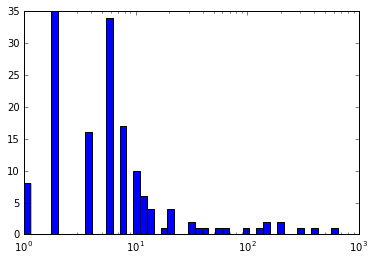

In [7]:
pl.hist(occurences, bins=10**np.linspace(0,3,50))
pl.gca().set_xscale("log")
plt.show()

In [8]:
sorted([(name,occurence) for name,occurence in zip(short_ids,occurences) if occurence], key=lambda x:x[1])


[('PT_250_4_007', 1),
 ('FCV_L116_002', 1),
 ('XV_L117_003', 1),
 ('XV_22_623_001', 1),
 ('FCV_L117_002', 1),
 ('T300_6_EL1', 1),
 ('XV_23_623_001', 1),
 ('FCV_L118_002', 1),
 ('XV_L116_004', 2),
 ('T420_2_EM1', 2),
 ('XV_625A_111', 2),
 ('PIT_420_02_002', 2),
 ('LSL_528_001', 2),
 ('MS_WW_420_02_001', 2),
 ('XV_529_005', 2),
 ('PTWW_300_6_7_001', 2),
 ('XV_250_1_030', 2),
 ('XV_L116_005', 2),
 ('XV_250_4_006', 2),
 ('T420_1_ET1', 2),
 ('T420_1_EM1', 2),
 ('HS_CR044_PLC07_ST625A_03', 2),
 ('XV_L116_001', 2),
 ('T420_2_EP1', 2),
 ('PIT_420_01_002', 2),
 ('XV_250_5_003', 2),
 ('HS_CR044_PLC07_ST625A_09', 2),
 ('XV_300_6_006', 2),
 ('MS_WW_420_01_001', 2),
 ('XV_250_1_006', 2),
 ('T420_3_EL1', 2),
 ('MS_WW_420_03_001', 2),
 ('XV_L116_003', 2),
 ('XV_300_4_010', 2),
 ('FT_250_4_AL_INIT', 2),
 ('XVWW_300_6_001', 2),
 ('T420_2_ET2', 2),
 ('TCVWW_250_4_5_003', 2),
 ('TTWW_250_4_5_003', 2),
 ('T420_1_ET2', 2),
 ('XV_1A_100', 2),
 ('STP_LA_300_8_031', 2),
 ('T420_1_EL1', 2),
 ('FT_250_3_AL_INIT